In [142]:
import pandas as pd
import numpy as np
import seaborn as sns

from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,6)})
plt.rcParams.update({'axes.grid':False})

import warnings
warnings.filterwarnings('ignore')

In [2]:
## our output feature is PM2.5 , means polution level
df = pd.read_csv('PRSA_Data_Dingling.csv')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [4]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [5]:
## here time series is inpart so combine it
def convet_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

aq_df = pd.read_csv('PRSA_Data_Dingling.csv', parse_dates=[['year','month','day','hour']] ,
                    date_parser=convet_to_date, keep_date_col=True)

In [6]:
aq_df.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [7]:
# convert month to numeric value because it is an object 
aq_df['month'] = aq_df['month'].astype(int)
# aq_df['month'] = pd.to_numeric(aq_df['month'])

In [8]:
# data which has no index
aq_df_non_indexed = aq_df.copy()

In [9]:
# setting year_month_day_hour as index column
aq_df = aq_df.set_index('year_month_day_hour')
aq_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [10]:
pm_data = aq_df['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

## 1. plot using one by one to clear view

<AxesSubplot:xlabel='year_month_day_hour'>

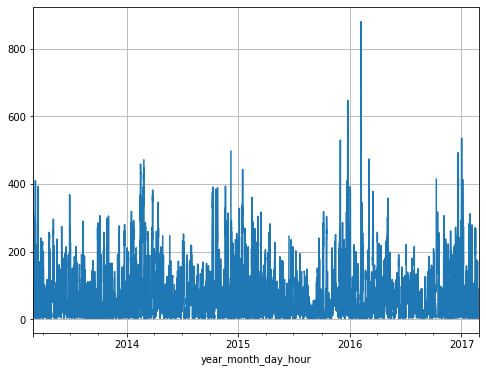

In [11]:
pm_data.plot(grid=True)

<AxesSubplot:xlabel='year_month_day_hour'>

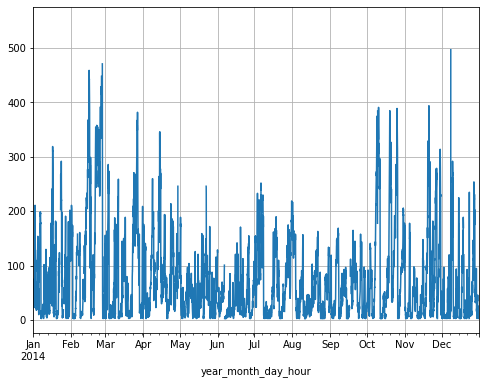

In [26]:
### we plot only one year data to clear visualization
pm_data['2014'].plot(grid=True)

<AxesSubplot:xlabel='year_month_day_hour'>

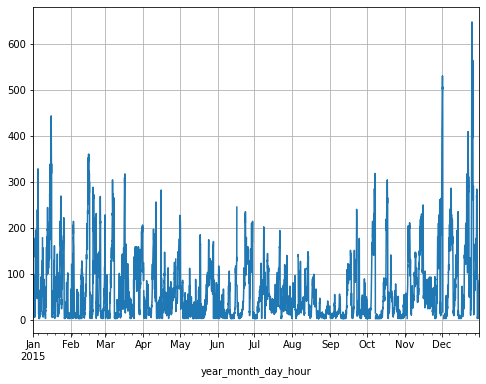

In [22]:
pm_data['2015'].plot(grid=True)

<AxesSubplot:xlabel='year_month_day_hour'>

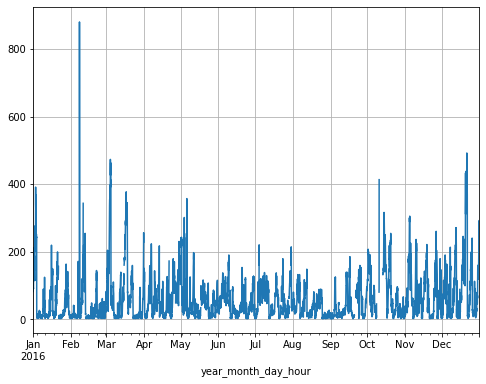

In [20]:
pm_data['2016'].plot(grid=True)

## 2. plot using plotly express

In [38]:
import plotly.express as px

fig = px.line(aq_df_non_indexed , x='year_month_day_hour', y='PM2.5' , title='PM2.5 with slider')

## if you want buttons then can pass parameter rangeselector
fig.update_xaxes(rangeslider_visible=True,
                 rangeselector = dict(
                     buttons=list([
                         dict(count=1,label='1y',step='year',stepmode='backward'),
                         dict(count=2,label='2y',step='year',stepmode='backward'),
                         dict(count=3,label='3y',step='year',stepmode='backward'),
                         dict(step='all')
                     ])
                     )
                )
fig.show()

## 3. plot overlay one above another

Text(0, 0.5, 'pm2.5')

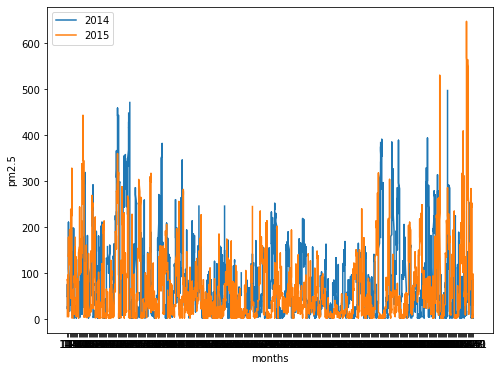

In [57]:
## ploting data in a basis of month day leaving the hour
df_2014 = aq_df['2014'].reset_index()
df_2014['month_day'] = df_2014.apply(lambda x : str(x['month'])+'-'+x['day'],axis=1  )

df_2015 = aq_df['2015'].reset_index()
df_2015['month_day'] = df_2014.apply(lambda x : str(x['month'])+'-'+x['day'],axis=1  )

plt.plot(df_2014['month_day'] , df_2014['PM2.5'] )
plt.plot(df_2015['month_day'] , df_2015['PM2.5'] )
plt.legend(['2014','2015'])
plt.xlabel('months')
plt.ylabel('pm2.5')

## Observation: 
1. here we can see some spikes in data , and in between there is no spikes so there is some kind of seasonality in data.
2. here we can see some spikes in oct , nov , dec ,jan , feb and mar months, which is winter seasons. it means in winter season PM2.5 is preety high.
3. in summers the PM2.5 is low
4. so we can say there is some seasonality in data

In [66]:
## we can also see in summer the pm2.5 less then winter.
aq_df['2014':'2015'][['month','PM2.5']].groupby('month').describe()

PM2.5                                                        
        count        mean         std  min   25%   50%     75%    max
month                                                                
1      1451.0   78.548518   77.606663  3.0  14.0  51.0  123.50  443.0
2      1292.0  113.558050  113.420308  3.0  16.0  74.0  178.25  548.0
3      1481.0   79.109926   79.641550  3.0  15.0  46.0  129.00  382.0
4      1404.0   71.699288   58.891713  3.0  28.0  57.0   98.00  346.0
5      1471.0   46.748946   41.730736  3.0  15.0  33.0   68.00  246.0
6      1401.0   45.360314   47.019916  3.0  11.0  24.0   64.00  245.0
7      1472.0   63.956929   54.652537  3.0  21.0  48.0   97.00  252.0
8      1472.0   43.440149   39.967375  3.0  13.0  30.0   61.00  217.0
9      1410.0   46.176312   43.755986  3.0  11.0  28.0   79.00  240.0
10     1462.0   85.192202   98.772074  3.0  11.0  43.0  119.75  391.0
11     1424.0   78.360815   74.184162  3.0  20.0  55.0  111.00  394.0
12     1450.0   84.130345  107.521023  3.0  10.0  38.0  128.00  647.0

In [71]:
aq_df['2014':'2015'][['month','PM2.5','TEMP']].groupby('month').agg({'PM2.5':['max','min'],'TEMP':['max','min']})

PM2.5       TEMP      
         max  min   max   min
month                        
1      443.0  3.0  12.4 -10.6
2      548.0  3.0  14.0 -10.9
3      382.0  3.0  26.0  -6.4
4      346.0  3.0  32.0   1.3
5      246.0  3.0  41.4   7.6
6      245.0  3.0  37.4  15.1
7      252.0  3.0  39.2  16.8
8      217.0  3.0  36.3  16.6
9      240.0  3.0  34.5  10.3
10     391.0  3.0  27.5   1.5
11     394.0  3.0  20.8 -10.3
12     647.0  3.0  11.6  -9.7

# 1. Bivariate and Multivariate analysis in PM2.5 and TEMP

array([<AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>], dtype=object)

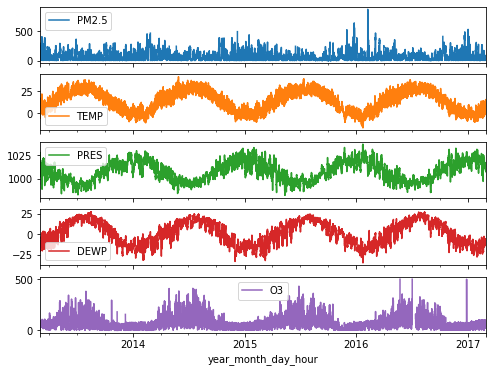

In [133]:
aq_df[['PM2.5','TEMP','PRES','DEWP','O3']].plot(subplots=True)

### Observations:
1. here we can clearly see it temp increse then PM2.5 decrese
2. if presure increse then PM2.5 increse
3. if temp increse presure decrese
4. if dewp increse then PM2.5 decrese
5. temp and dewp (due point temp ) both correlated
6. pm2.5 and pressure both correlated
7. o3 increse due point temp , temp increse and pressure and pm2.5 decrese 

array([<AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>], dtype=object)

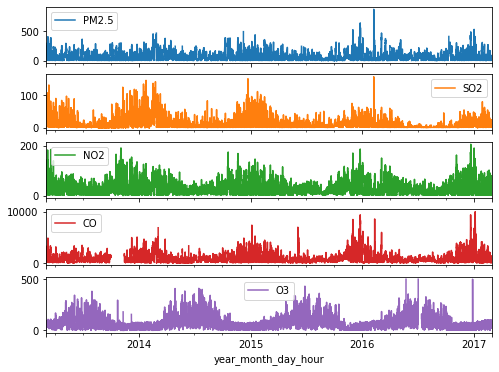

In [134]:
aq_df[['PM2.5','SO2','NO2','CO','O3']].plot(subplots=True)

### observation:
1. it is pretty much obous when the gases so2 , no2 and co increse then PM2.5 increse.
2. as o3 increse all gaes decrese

<AxesSubplot:xlabel='year_month_day_hour'>

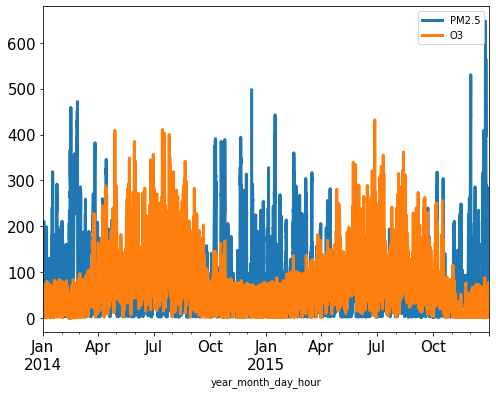

In [141]:
aq_df['2014':'2015'][['PM2.5','O3']].plot(linewidth=3,fontsize=15)

array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'TEMP'}>]], dtype=object)

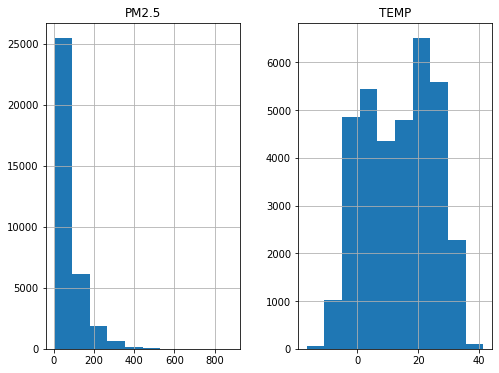

In [101]:
aq_df[['PM2.5','TEMP']].hist()

<AxesSubplot:ylabel='Density'>

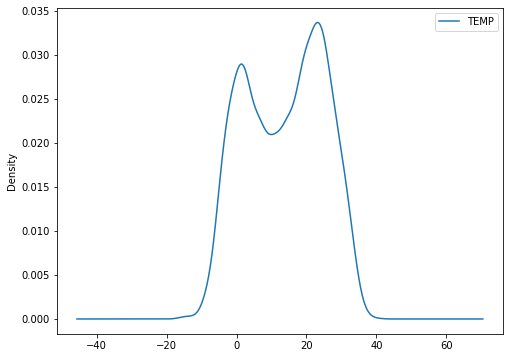

In [104]:
## this is bi model distribution , peek during winter and summer
aq_df[['TEMP']].plot(kind='density')

### Lag Plot :
1. if linear plot then AutoRegressive model can be a good choice.
2. it comapre itself by its own lag it is called AutoCorrelation. lag can be 1 order , 2 order 3 order lagplot
3. it can be used for identifying randomness ,serial or auto correlation , outliers

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

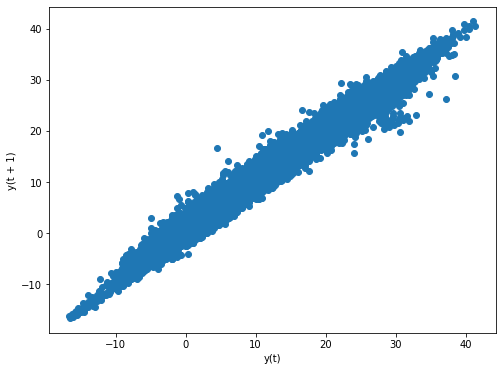

In [127]:
## we have hourly data so 1 lag means 1 hour.
pd.plotting.lag_plot(aq_df['TEMP'],lag=1)

# we can clearly see the linear relationship with 1 hour lag
# clearly see the high +ve auto correlation 

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 24)'>

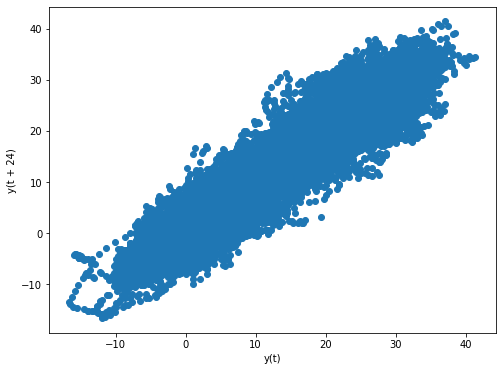

In [108]:
## here 24 hours lag means 1 day.
pd.plotting.lag_plot(aq_df['TEMP'],lag=24)

# data is less +ve correlated as compare to 1 hour lag

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 720)'>

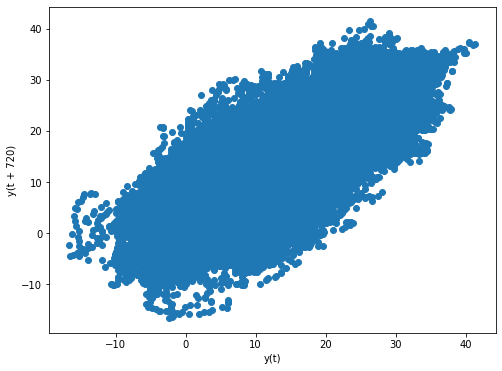

In [111]:
## here (24*30) = 720 hours lag means 1 month.
pd.plotting.lag_plot(aq_df['TEMP'],lag=720)

# data is less +ve correlated as compare to 1 hour lag and 1 hour lag

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 8640)'>

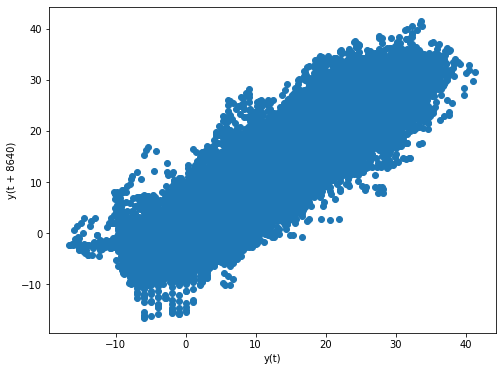

In [119]:
## here (24*30) = 720*12 hours lag means 12 month == 1 year.
pd.plotting.lag_plot(aq_df['TEMP'],lag=8640)

# data is less +ve correlated 

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 4320)'>

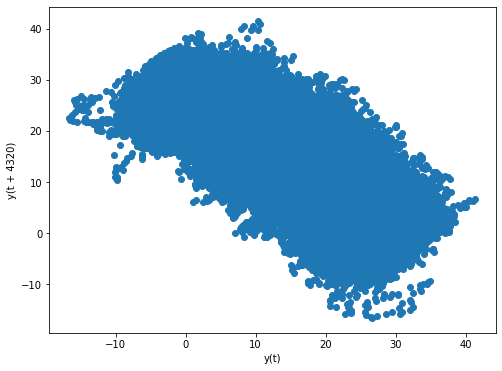

In [120]:
## here (24*30) = 720*6 hours lag means 6 month
pd.plotting.lag_plot(aq_df['TEMP'],lag=4320)

# data is correlated but negitive correlated.
# because of seasonality winter and summer

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2160)'>

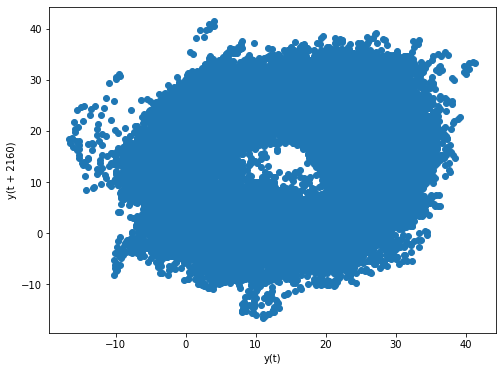

In [123]:
## here (24*30) = 720*3 hours lag means 3 month
pd.plotting.lag_plot(aq_df['TEMP'],lag=2160)

# data is spreaded
# because of no correlation

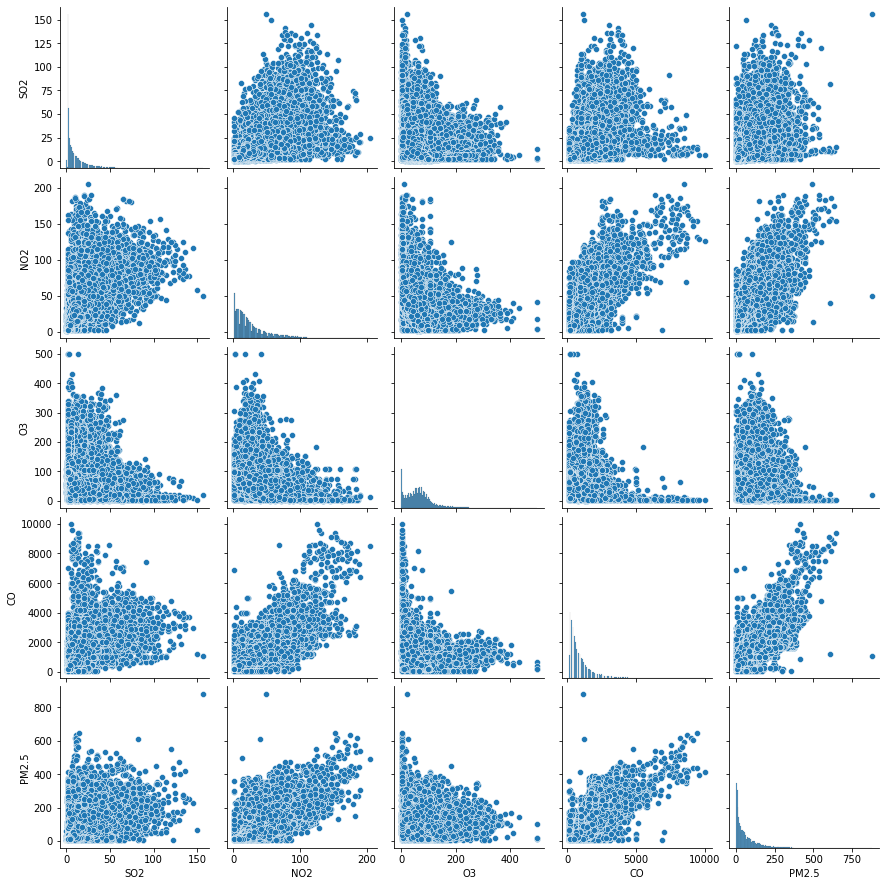

In [144]:
## here we can see correlation
sns.pairplot(aq_df[['SO2','NO2','O3','CO','PM2.5']])

In [145]:
## seeing correlation matrix
aq_df[['SO2','NO2','O3','CO','PM2.5']].corr()

,SO2,NO2,O3,CO,PM2.5
SO2,1.000000,0.610433,-0.182096,0.529182,0.475117
NO2,0.610433,1.000000,-0.373625,0.798753,0.718170
O3,-0.182096,-0.373625,1.000000,-0.303275,-0.100542
CO,0.529182,0.798753,-0.303275,1.000000,0.802737
PM2.5,0.475117,0.718170,-0.100542,0.802737,1.000000


<AxesSubplot:>

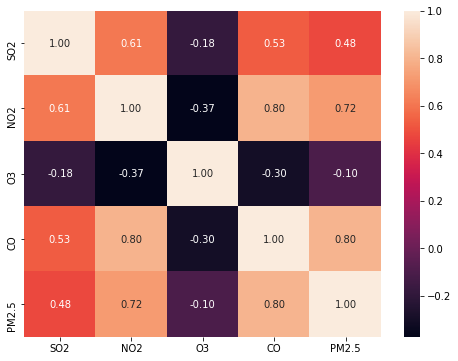

In [153]:
sns.heatmap(aq_df[['SO2','NO2','O3','CO','PM2.5']].corr(),annot=True,fmt='.2f')

## Autocorrelation plot
1. it measure the correlation with laged value
2. if linear plot then AutoRegressive model can be a good choice.
3. it comapre itself by its own lag it is called AutoCorrelation. lag can be 1 order , 2 order 3 order lagplot
4. it can be used for identifying randomness ,serial or auto correlation , outliers

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

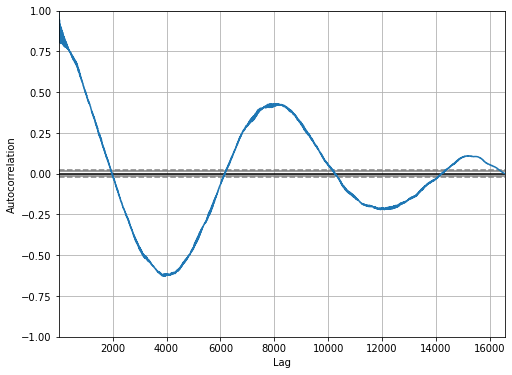

In [155]:
## we do not delete or drop the rows because data is collected sequencely 
## but only for desplaying the AutoCorrelation
pd.plotting.autocorrelation_plot(aq_df['2014':'2015'].dropna()['TEMP'])

## it measure the correlation with laged value
## here we can see some seasonality on every year , 
## here laged value in hours 

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

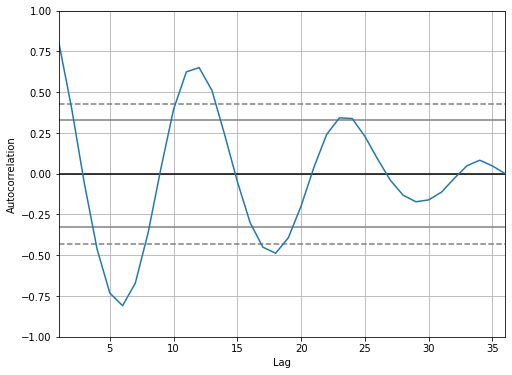

In [163]:
## monthely format using resample method
pd.plotting.autocorrelation_plot(aq_df['2014':'2016'].dropna()['TEMP'].resample('1m').mean())

## here we can see every month data peeking so there is some seasonality
## the dahsed and straight line is confidance interval
## first dashed line is 95% the second 90

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

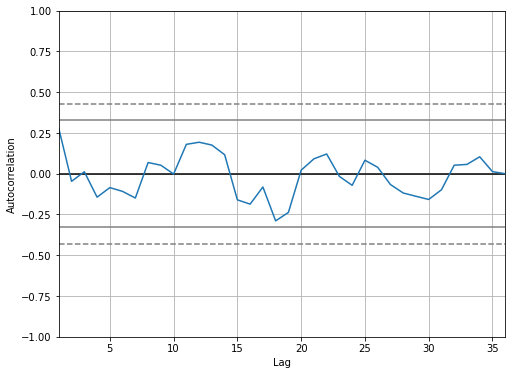

In [165]:
## monthely format using resample method
pd.plotting.autocorrelation_plot(aq_df['2014':'2016'].dropna()['PM2.5'].resample('1m').mean())

## here we can not seeing peeks or confidance level high so here is less or no auto correlation